In [1]:
import os
import sys

# run this block once only
project_root = os.path.abspath("../../")  # 根据文件层级调整路径
os.chdir(project_root)

if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [2]:
import pandas as pd

In [3]:
current_path = os.getcwd()
print(current_path)

c:\Users\bankey\Documents\GitHub\MALSugoi


In [4]:
file_path = './data/user_animelist/anime_info.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df

,username,anime,rating
0,cindia,Loving Angel Angelique: When Hearts Awaken,-
1,cindia,La corda d'oro: primo passo,9
2,Yuber,Drifters,-
3,Yuber,Hakyu Hoshin Engi,-
4,Yuber,JoJo's Bizarre Adventure: Diamond Is Unbreakable,9
...,...,...,...
65961,aria__,Kamichu!,8
65962,aria__,Karas,7
65963,aria__,Kurenai,-
65964,aria__,Monster,-


In [7]:
df = df[df["rating"] != "-"]

In [8]:
df.describe()

,username,anime,rating
count,46343,46343,46343
unique,560,4896,10
top,Obsid,Death Note,8
freq,300,255,11633


In [9]:
print(df["rating"].unique())

['9' '7' '8' '3' '6' '10' '5' '4' '1' '2']


In [10]:
# 将 rating 列强制转换为数值类型
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

C:\Users\bankey\AppData\Local\Temp\ipykernel_26216\2747025695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = pd.to_numeric(df["rating"], errors="coerce")


In [11]:
# 计算动漫的平均评分和观看人数
anime_stats = df.groupby("anime").agg(
    avg_rating=("rating", "mean"),  # 平均评分
    watch_count=("username", "count")  # 观看人数
).reset_index()

# 按观看人数降序排序（可选）
anime_stats = anime_stats.sort_values(by="watch_count", ascending=False)

anime_stats

,anime,avg_rating,watch_count
1171,Death Note,8.721569,255
1677,Fullmetal Alchemist,8.596639,238
673,Bleach,7.957082,233
3231,Naruto,7.565854,205
1465,Elfen Lied,8.063725,204
...,...,...,...
4889,selector spread WIXOSS,8.000000,1
60,A Chinese Ghost Story,9.000000,1
4833,Yu-Gi-Oh! Zexal II,8.000000,1
4836,Yume Tsukai,6.000000,1


In [12]:
anime_stats.count

<bound method DataFrame.count of                                     anime  avg_rating  watch_count
1171                           Death Note    8.721569          255
1677                  Fullmetal Alchemist    8.596639          238
673                                Bleach    7.957082          233
3231                               Naruto    7.565854          205
1465                           Elfen Lied    8.063725          204
...                                   ...         ...          ...
4889               selector spread WIXOSS    8.000000            1
60                  A Chinese Ghost Story    9.000000            1
4833                   Yu-Gi-Oh! Zexal II    8.000000            1
4836                          Yume Tsukai    6.000000            1
4838  Yume-iro Pâtissière SP Professional    1.000000            1

[4896 rows x 3 columns]>

In [13]:
file2_path = './data/anime_info/anime_data.csv'

In [14]:
anime_data = pd.read_csv(file2_path)

In [15]:
anime_data

,title,score,genres,ranked,popularity,members,favorites
0,Sousou no Frieren,9.32,"Adventure, Drama, Fantasy, Shounen",#1,#187,"941,889","56,180"
1,One Piece Fan Letter,9.16,"Action, Adventure, Fantasy, Shounen",#2,#3026,"57,604","1,564"
2,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense, Psychological, Time T...",#4,#14,"2,633,363","192,236"
3,Fullmetal Alchemist: Brotherhood,9.09,"Action, Adventure, Drama, Fantasy, Military, S...",#3,#3,"3,437,111","229,464"
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama, Suspense, Gore, Military, Survi...",#5,#21,"2,364,853","59,839"
...,...,...,...,...,...,...,...
4995,Moshidora,6.86,"Drama, Sports, Team Sports",#4996,#4823,"22,509",21
4996,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,6.86,"Comedy, Shounen",#4997,#2521,"79,340",66
4997,No Guns Life,6.86,"Action, Drama, Sci-Fi, Seinen",#4998,#1258,"200,111",322
4998,Paradox Live the Animation,6.86,"Drama, Sci-Fi, Music",#4999,#3718,"39,448",430


In [16]:
filtered_data1 = anime_stats[anime_stats["anime"].isin(anime_data["title"])]

In [17]:
filtered_data1

,anime,avg_rating,watch_count
1171,Death Note,8.721569,255
673,Bleach,7.957082,233
3231,Naruto,7.565854,205
1465,Elfen Lied,8.063725,204
1048,Cowboy Bebop,8.926554,177
...,...,...,...
4848,Yuu☆Yuu☆Hakusho: Eizou Hakusho - Ankoku Bujuts...,9.000000,1
4851,Yu☆Gi☆Oh! Duel Monsters: Battle City Special,7.000000,1
4852,Yu☆Gi☆Oh! The Dark Side of Dimensions,7.000000,1
4857,Zan Sayonara Zetsubou Sensei Bangaichi,8.000000,1


In [18]:
import matplotlib.pyplot as plt


C:\Users\bankey\AppData\Local\Temp\ipykernel_26216\3319009865.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["watch_count_group"] = filtered_data1["watch_count"].apply(group_watch_count)


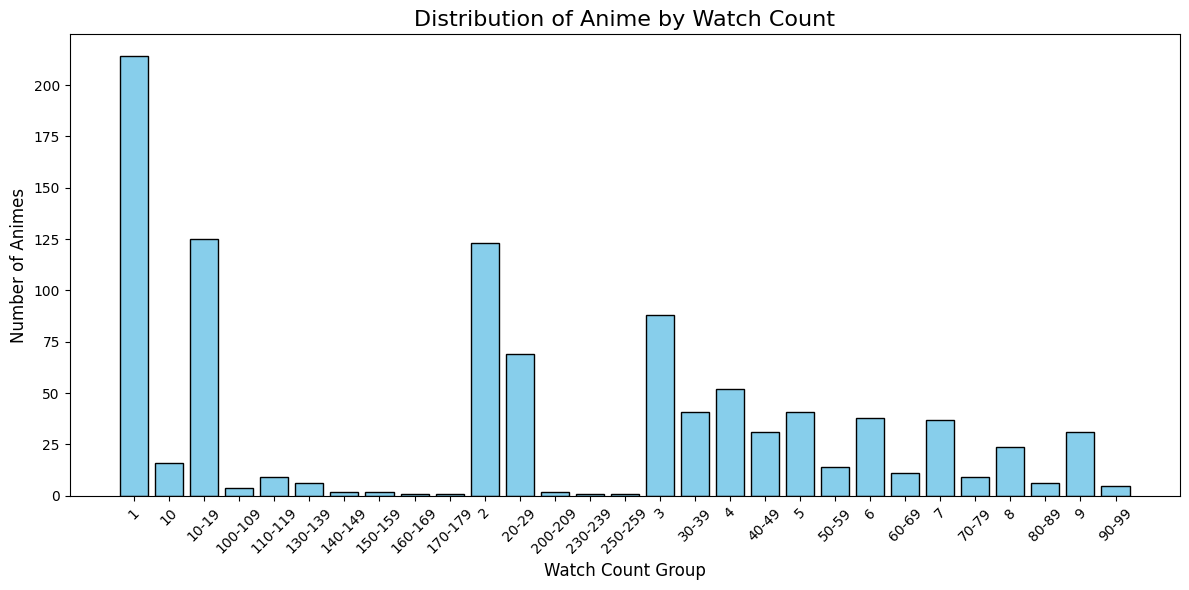

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# 自定义分组逻辑
def group_watch_count(x):
    if x <= 10:
        return str(x)  # 0-10 每个单独分组
    else:
        return f"{x // 10 * 10}-{x // 10 * 10 + 9}"  # 超过 10 的部分按区间分组

# 分组
filtered_data1["watch_count_group"] = filtered_data1["watch_count"].apply(group_watch_count)

# 统计每个分组的数量
watch_count_distribution = filtered_data1["watch_count_group"].value_counts().sort_index()

# 绘制条形图
plt.figure(figsize=(12, 6))
plt.bar(watch_count_distribution.index, watch_count_distribution.values, color="skyblue", edgecolor="black")

# 添加标题和轴标签
plt.title("Distribution of Anime by Watch Count", fontsize=16)
plt.xlabel("Watch Count Group", fontsize=12)
plt.ylabel("Number of Animes", fontsize=12)

# 旋转 x 轴标签以防止重叠
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()

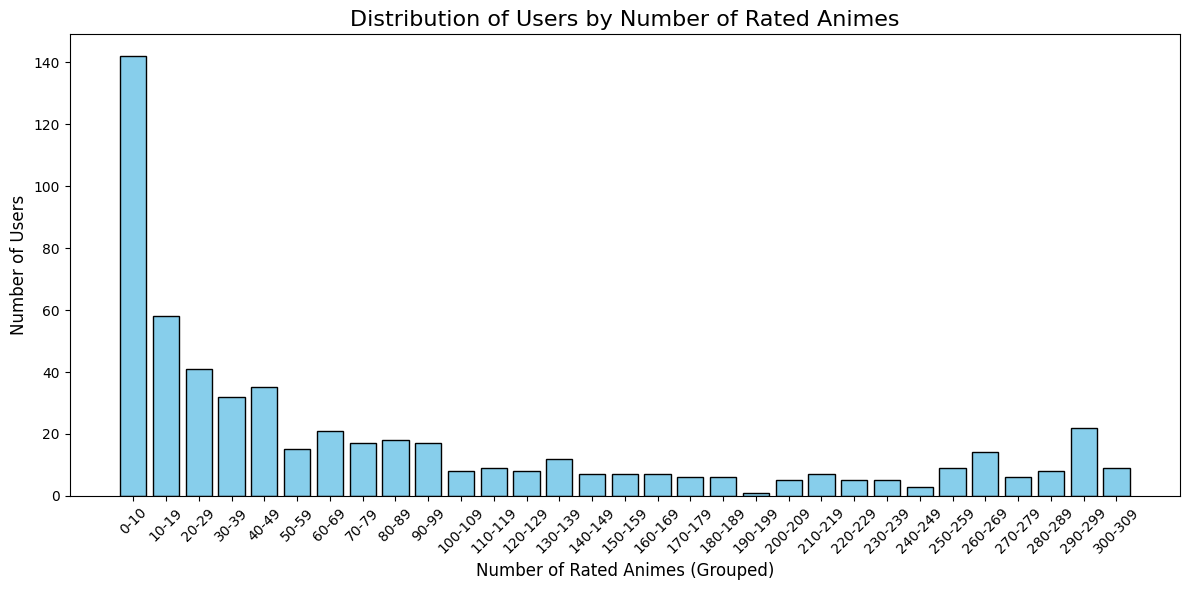

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame
user_watch_count = df.groupby("username")["anime"].count()

# 自定义分组逻辑
def group_watch_count(x):
    if x <= 10:
        return "0-10"
    else:
        return f"{x // 10 * 10}-{x // 10 * 10 + 9}"

# 分组
user_watch_count_group = user_watch_count.apply(group_watch_count)

# 按分组统计用户数
user_watch_distribution = user_watch_count_group.value_counts()

# 确保分组标签按数值顺序排序
user_watch_distribution = user_watch_distribution.sort_index(key=lambda x: pd.Series(x).str.extract(r'(\d+)').astype(int)[0])

# 绘制条形图
plt.figure(figsize=(12, 6))
plt.bar(user_watch_distribution.index, user_watch_distribution.values, color="skyblue", edgecolor="black")

# 添加标题和轴标签
plt.title("Distribution of Users by Number of Rated Animes", fontsize=16)
plt.xlabel("Number of Rated Animes (Grouped)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

# 旋转 x 轴标签以防止重叠
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()